# Summary of coverage (units, area, population)

In [105]:
import dask.dataframe as dd
import geopandas

In [106]:
path = "../../urbangrammar_samba/spatial_signatures/functional/population"

In [107]:
population = dd.read_parquet(path)

In [108]:
population

,hindex,population
npartitions=103,,
,object,float64
,...,...
...,...,...
,...,...
,...,...


In [109]:
types_path = "../../urbangrammar_samba/spatial_signatures/signatures/signatures_combined_tessellation"
types = dd.read_parquet(types_path, columns=['hindex', 'signature_type'])

In [110]:
types.head()

,hindex,signature_type
0,c000e109777t0000,6
1,c000e109777t0001,6
2,c000e109777t0002,6
3,c000e109777t0003,6
4,c000e109777t0004,6


In [111]:
combined = population.merge(types, on='hindex', how="left")
combined

,hindex,population,signature_type
npartitions=103,,,
,object,float64,int32
,...,...,...
...,...,...,...
,...,...,...
,...,...,...


In [114]:
summary = combined.groupby('signature_type').agg({"population": sum, "hindex": "count"})

In [115]:
summary = summary.compute()

In [117]:
summary.population.sum()

67140883.00504927

In [121]:
summary = summary.rename(columns={
    "hindex": "count",
})

In [119]:
types = {
    0: "Countryside agriculture",
    1: "Accessible suburbia",
    3: "Open sprawl",
    4: "Wild countryside",
    5: "Warehouse/Park land",
    6: "Gridded residential quarters",
    7: "Urban buffer",
    8: "Disconnected suburbia",
    20: "Dense residential neighbourhoods",
    21: "Connected residential neighbourhoods",
    22: "Dense urban neighbourhoods",
    90: "Local urbanity",
    91: "Concentrated urbanity",
    92: "Regional urbanity",
    94: "Metropolitan urbanity",
    95: "Hyper concentrated urbanity",
    93: "outlier",
    96: "outlier",
    97: "outlier",
    98: "outlier",
}

summary.index = summary.index.map(types)

In [25]:
summary.to_csv("summary.csv")

<AxesSubplot:xlabel='signature_type'>

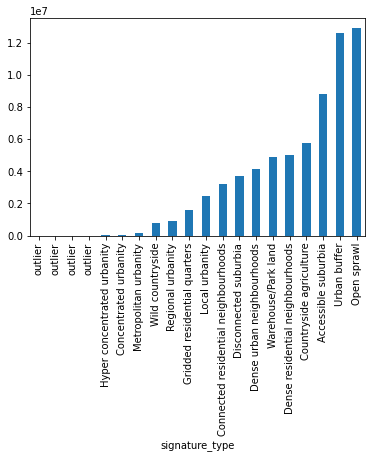

In [120]:
summary['population'].sort_values().plot.bar()

In [122]:
summary

,population,count
signature_type,,
Countryside agriculture,5.765794e+06,3022385
Accessible suburbia,8.848915e+06,1962830
Open sprawl,1.291983e+07,2561211
Wild countryside,7.738578e+05,595902
Warehouse/Park land,4.885898e+06,707211
Gridded residential quarters,1.622579e+06,209959
Urban buffer,1.262026e+07,3686554
Disconnected suburbia,3.695715e+06,564318
Dense residential neighbourhoods,5.016013e+06,502835
